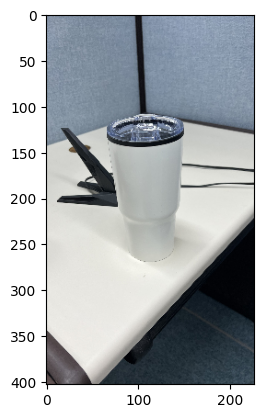

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

filepath = os.getcwd()

image1 = cv2.imread("./sample1.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1 = cv2.resize(image1, dsize=(0,0), fx=0.1, fy=0.1)

plt.imshow(image1, cmap="gray")
plt.show()

In [2]:
def add_gaussian_noise(image, sigma, beta):
    # 가우시안 노이즈 추가
    noise = np.random.normal(0, sigma, image.shape).astype('float64') * 255
    noisy_image = (1 - beta) ** 0.5 * image + beta * noise
    
    # 픽셀 값이 0~255 범위를 벗어나지 않도록 클리핑
    noisy_image = np.clip(noisy_image, 0, 255)
    
    return noisy_image


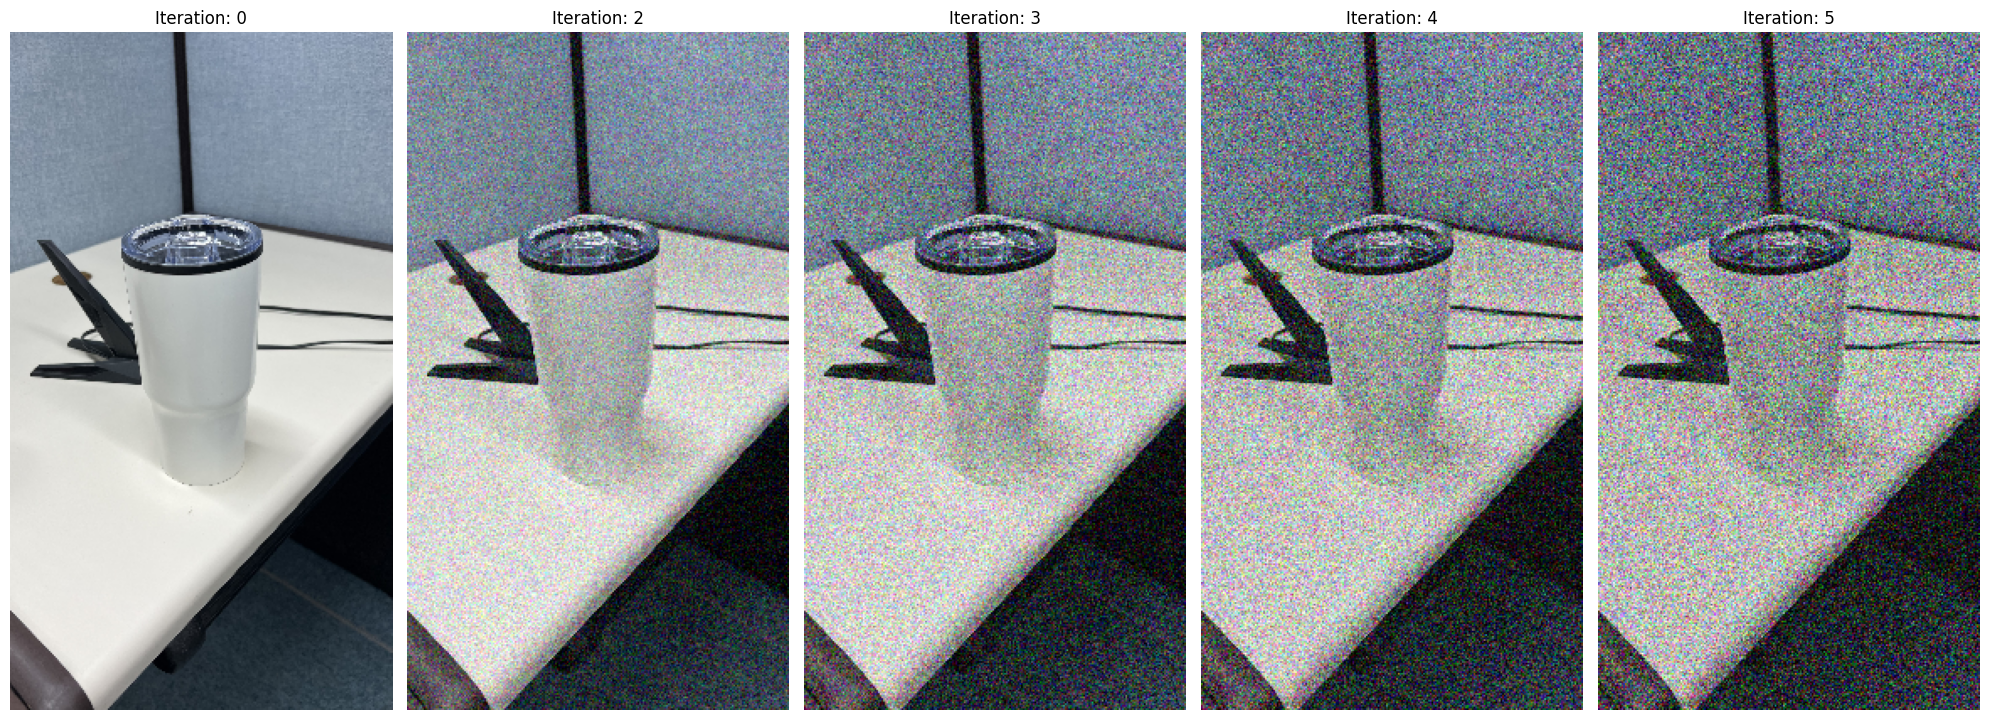

In [3]:
# 노이즈 추가 및 결과 표시
sigma = 1.0
beta = 0.1

noisy_image = image1.copy()

fig, axes = plt.subplots(1, 5, figsize=(20, 8))

axes[0].imshow(noisy_image.astype(np.uint8), cmap="gray")
axes[0].set_title(f'Iteration: {0}')
axes[0].axis('off')

for i in range(1,5):
    noisy_image = add_gaussian_noise(noisy_image, sigma, beta)
    axes[i%5].imshow(noisy_image.astype(np.uint8), cmap="gray")
    axes[i%5].set_title(f'Iteration: {i+1}')
    axes[i%5].axis('off')

plt.tight_layout()
plt.show()

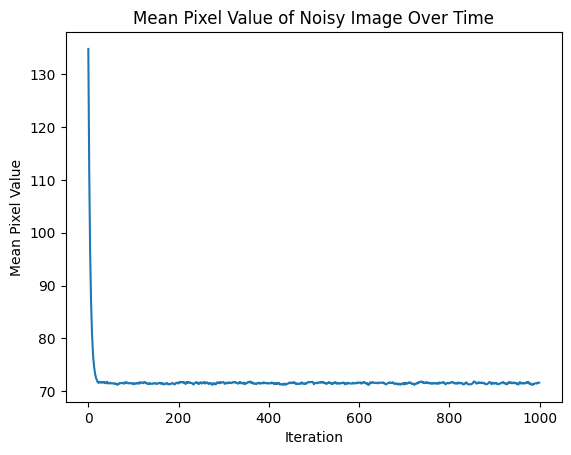

In [4]:
noisy_image = image1.copy()
mean_values = []

for i in range(1000):
    noisy_image = add_gaussian_noise(noisy_image, sigma, 0.2)
    mean_value = np.mean(noisy_image)
    mean_values.append(mean_value)

plt.plot(mean_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Pixel Value')
plt.title('Mean Pixel Value of Noisy Image Over Time')
plt.show()

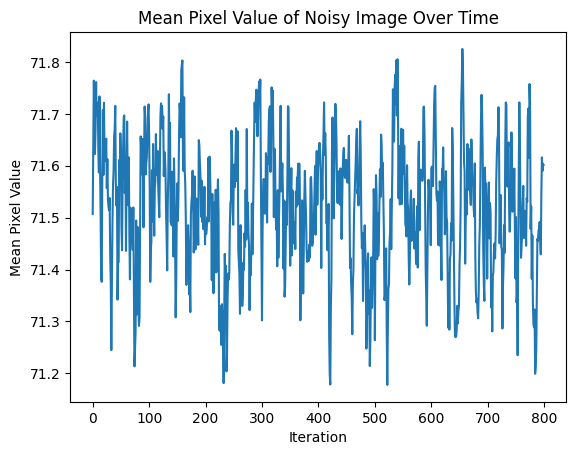

In [5]:
plt.plot(mean_values[200:])
plt.xlabel('Iteration')
plt.ylabel('Mean Pixel Value')
plt.title('Mean Pixel Value of Noisy Image Over Time')
plt.show()